In [1]:
"""
Today we will be looking at the 2 Naive Bayes classification algorithms SeaLion has to offer - gaussian and multinomial (more common).
Both of them use the same underlying principles and as usual we'll explain them step by step. 
"""

# first import
import sealion as sl 
from sealion.naive_bayes import GaussianNaiveBayes, MultinomialNaiveBayes

In [2]:
"""
We'll first start with gaussian naive bayes. The way it works is by creating a normal (gaussian) curve to measure the
probability of any certain feature occuring for a given class. It looks at the probability for a feature to be on 
each class possible. The way it makes its predictions on a given data point is by just looking at the probability of
each feature in the point for each class, and as it after aggregating all of the probabilities for all of the features
will predict the class with the highest probability. 
"""

# we will use the iris dataset for this
from sklearn.datasets import load_iris
X, y = load_iris()['data'], load_iris()['target']

# and let's split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 3) # another thing to note : 
# with naive bayes, try to always have as balanced data for all classes as possible. 

In [3]:
# we can now setup the model
gnb = GaussianNaiveBayes() 
gnb.fit(X_train, y_train) # fit the model

In [4]:
gnb.evaluate(X_test, y_test) # we can evaluate it

0.9833333492279053

In [5]:
# WOAH! Looks like we do pretty well with this model. Let's see how much we got wrong.
y_pred = gnb.predict(X_test)
y_pred == y_test 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [6]:
# 1 wrong. Super simple, right? 

# onto multinomial naive bayes

"""
Multinomial Naive Bayes is a type of naive bayes that will work with stuff like text classification, where you have 
a dataset where each observation/data point is just a word. This could look like :  ["hello", "what", "do", "you", "want", "from", "me"]
for a given data point. Each feature is the exact same here, so what if a model could look split all data into its classes, 
and then see the probability of finding a feature (i.e. "hello") for that class. For example if you have a dataset of 100 emails,
50 spam and 50 ham - you can split the 100 into a dataset of 50 spam and 50 ham and then count the number of 
times "hello" and all other features show up in each of those 50 class-datasets (doesn't matter where.) Then if you are given a new
data point you can see the probability of seeing each of its features for each class, and choose the class with the
highest probability. This is the underlying idea behind multinomial naive bayes. 
"""

# let's get started
# the spam dataset is available here : https://www.kaggle.com/uciml/sms-spam-collection-dataset
import pandas as pd
spam_df = pd.read_csv("spam.csv", engine = "python", encoding='ISO-8859-1') # we need to manually define the encoding
spam_df # print it out

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
# as usual data manipulation is honestly not as fun as the algorithms, so we're going to have to get our hands dirty
X, y = spam_df['v2'], spam_df['v1']
X, y # let's print this stuff out

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                Will Ì_ b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: v2, Length: 5572, dtype: object,
 0        ham
 1        ham
 2       spam
 3        ham
 4        ham
         ... 
 5567    spam
 5568     ham
 5569     ham
 5570     ham
 5571     ham
 Name: v1, Length: 5572, dtype: object)

In [8]:
# it looks like we have plenty of data 
# the first step is tokenize, where we take those strings in each data point and turn them into unique numbers. This
# will apply throughout, so "hello" as 100 in one data point is the same for another

VOCAB_SIZE = 10000 # we allow 10000 words
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = VOCAB_SIZE)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

from tensorflow.keras.preprocessing.sequence import pad_sequences
# we'll also want to pad it, meaning that we make sure everything is the same length
X_pad = pad_sequences(X_seq, maxlen = 100, truncating = "post", padding = "post")

In [10]:
# and we will want to split it up now
from sklearn.model_selection import train_test_split
import numpy as np
y = np.array(y)
y[np.where(y == "ham")] = 0 
y[np.where(y == "spam")] = 1 # spam is 1

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.15, random_state = 3)

In [11]:
# let's print out X_train
X_train

array([[   8, 6115, 6116, ...,    0,    0,    0],
       [  27,  117,  217, ...,    0,    0,    0],
       [ 100,  767,  114, ...,    0,    0,    0],
       ...,
       [  23,   21,   11, ...,    0,    0,    0],
       [  46,  767,    1, ...,    0,    0,    0],
       [2765, 5776, 5777, ...,    0,    0,    0]], dtype=int32)

In [12]:
# time to start using Multinomial Naive Bayes
mnb = MultinomialNaiveBayes()
mnb.fit(X_train, y_train)

In [13]:
# time to evaluate
mnb.evaluate(X_test, y_test)

0.9940191507339478

In [14]:
# dang ... but hmmm is it just predicting 0s? Is that why? 
mnb.predict(X_test)[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

array([[718.,   0.],
       [  5., 113.]])

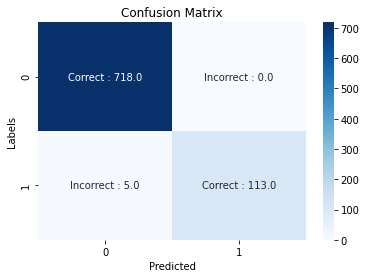

In [15]:
# looks like it did phenomenal. And of course, we're going to use a confusion matrix. 
from sealion.utils import confusion_matrix
confusion_matrix(mnb.predict(X_test), y_test)

In [16]:
# The only thing we get wrong is thinking something is fine when its not. I think that's better than 
# the opposite, where you miss something important and it goes into your spam folder...

# Look's like that's the end for us. As usual, I hope you enjoyed this tutorial!